In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score # 정확도 계산을 위한 도구

# =============================================================
# 1. 데이터 준비 (CSV 파일 로딩)
# =============================================================
try:
    # 이전에 저장한 훈련 데이터와 테스트 데이터를 불러옵니다.
    train_df = pd.read_csv("samsung_train_dataset.csv")
    test_df = pd.read_csv("samsung_test_dataset.csv")
    print("✅ 훈련 및 테스트 CSV 파일 로드 성공!")
    print(f"훈련 데이터: {train_df.shape[0]} 경기, 테스트 데이터: {test_df.shape[0]} 경기")
except FileNotFoundError:
    print("❌ CSV 파일을 찾을 수 없습니다. 이전 단계에서 파일이 정상적으로 저장되었는지 확인해주세요.")
    # 파일이 없으면 더 이상 진행하지 않음
    train_df, test_df = None, None

if train_df is not None:
    # =============================================================
    # 2. 입력 피처(X)와 정답(y) 분리
    # =============================================================
    
    # 'samsung_win'은 우리가 맞춰야 할 정답(Target/Label)입니다.
    # 'game_date'는 모델 학습에 직접 사용하지 않는 식별자이므로 제외합니다.
    TARGET = 'samsung_win'
    EXCLUDE_COLS = [TARGET, 'game_date', 'game_id'] 

    FEATURES = [col for col in train_df.columns if col not in EXCLUDE_COLS]
    
    # 훈련 데이터셋 분리
    X_train = train_df[FEATURES]
    y_train = train_df[TARGET]

    # 테스트 데이터셋 분리
    X_test = test_df[FEATURES]
    y_test = test_df[TARGET]

    print("\n✅ 데이터셋을 피처(X)와 타겟(y)으로 성공적으로 분리했습니다.")
    print(f"사용된 피처: {FEATURES}")

    # =============================================================
    # 3. 베이스라인 모델 1: 피타고리안 승률 모델 평가
    # =============================================================
    
    # 피타고리안 모델은 별도의 '학습' 과정이 없습니다.
    # 단순히 'samsung_pythagorean' 값이 0.5보다 크면 승리를 예측합니다.
    # (상대팀의 피타고리안 승률도 고려하여, 삼성의 기대 승률이 더 높을 때 승리를 예측합니다.)
    
    pythagorean_preds = (X_test['samsung_pythagorean'] > X_test['opponent_pythagorean']).astype(int)

    # 예측 결과와 실제 정답(y_test)을 비교하여 정확도를 계산합니다.
    pythagorean_accuracy = accuracy_score(y_test, pythagorean_preds)

    print("\n--- 📊 베이스라인 모델 1: 피타고리안 승률 성능 ---")
    # 소수점 4자리까지 백분율로 표시
    print(f"예측 정확도 (Accuracy): {pythagorean_accuracy:.4f} ({pythagorean_accuracy:.2%})")

✅ 훈련 및 테스트 CSV 파일 로드 성공!
훈련 데이터: 427 경기, 테스트 데이터: 142 경기

✅ 데이터셋을 피처(X)와 타겟(y)으로 성공적으로 분리했습니다.
사용된 피처: ['samsung_elo', 'opponent_elo', 'rest_diff', 'samsung_form', 'opponent_form', 'samsung_pythagorean', 'opponent_pythagorean']

--- 📊 베이스라인 모델 1: 피타고리안 승률 성능 ---
예측 정확도 (Accuracy): 0.5493 (54.93%)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# =============================================================
# 4. 베이스라인 모델 2: 로지스틱 회귀 모델 학습 및 평가
# =============================================================

# 로지스틱 회귀는 피처들의 스케일에 영향을 받으므로, 
# StandardScaler를 사용해 모든 피처의 단위를 표준화해주는 것이 성능에 도움이 됩니다.
# Pipeline을 사용하면 이 과정을 모델 학습과 한 번에 묶어서 편리하게 처리할 수 있습니다.

# 1. 모델 생성 (스케일러 + 로지스틱 회귀)
logistic_model = Pipeline([
    ('scaler', StandardScaler()), # 1단계: 데이터 표준화
    ('classifier', LogisticRegression(random_state=42)) # 2단계: 로지스틱 회귀 학습
])

# 2. 모델 학습
# 훈련 데이터(X_train, y_train)를 사용해 모델을 학습시킵니다.
logistic_model.fit(X_train, y_train)
print("✅ 로지스틱 회귀 모델 학습 완료.")

# 3. 모델 예측
# 학습된 모델로 테스트 데이터(X_test)의 승패를 예측합니다.
logistic_preds = logistic_model.predict(X_test)

# 4. 성능 평가
logistic_accuracy = accuracy_score(y_test, logistic_preds)

print("\n--- 📊 베이스라인 모델 2: 로지스틱 회귀 성능 ---")
print(f"예측 정확도 (Accuracy): {logistic_accuracy:.4f} ({logistic_accuracy:.2%})")

# =============================================================
# 5. 중간 결과 비교
# =============================================================
print("\n--- 📈 모델 성능 중간 비교 ---")
print(f"1. 피타고리안 승률 모델: {pythagorean_accuracy:.2%}")
print(f"2. 로지스틱 회귀 모델   : {logistic_accuracy:.2%}")

✅ 로지스틱 회귀 모델 학습 완료.

--- 📊 베이스라인 모델 2: 로지스틱 회귀 성능 ---
예측 정확도 (Accuracy): 0.5211 (52.11%)

--- 📈 모델 성능 중간 비교 ---
1. 피타고리안 승률 모델: 54.93%
2. 로지스틱 회귀 모델   : 52.11%


In [4]:
from sklearn.ensemble import RandomForestClassifier

# =============================================================
# 6. 추가 실험: 랜덤 포레스트 모델 학습 및 평가
# =============================================================

# 랜덤 포레스트는 결정 트리 기반 모델이라 StandardScaler가 필수는 아닙니다.
# 1. 모델 생성
# n_estimators=100: 100명의 전문가(트리)로 구성된 위원회를 만듭니다.
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 2. 모델 학습
random_forest_model.fit(X_train, y_train)
print("✅ 랜덤 포레스트 모델 학습 완료.")

# 3. 모델 예측
rf_preds = random_forest_model.predict(X_test)

# 4. 성능 평가
rf_accuracy = accuracy_score(y_test, rf_preds)

print("\n--- 📊 추가 실험: 랜덤 포레스트 성능 ---")
print(f"예측 정확도 (Accuracy): {rf_accuracy:.4f} ({rf_accuracy:.2%})")

# =============================================================
# 7. 최종 결과 비교 (3개 모델)
# =============================================================
print("\n--- 📈 모델 성능 최종 비교 ---")
print(f"1. 피타고리안 승률 모델: {pythagorean_accuracy:.2%}")
print(f"2. 로지스틱 회귀 모델   : {logistic_accuracy:.2%}")
print(f"3. 랜덤 포레스트 모델   : {rf_accuracy:.2%}")

✅ 랜덤 포레스트 모델 학습 완료.

--- 📊 추가 실험: 랜덤 포레스트 성능 ---
예측 정확도 (Accuracy): 0.5211 (52.11%)

--- 📈 모델 성능 최종 비교 ---
1. 피타고리안 승률 모델: 54.93%
2. 로지스틱 회귀 모델   : 50.70%
3. 랜덤 포레스트 모델   : 52.11%


In [15]:
import lightgbm as lgb

# =============================================================
# 8. 최종 모델: LightGBM 모델 학습 및 평가
# =============================================================

# 1. 모델 생성
# random_state=42: 결과를 재현하기 위한 설정
# n_jobs=-1: 컴퓨터의 모든 CPU 코어를 사용해 학습 속도를 높입니다.
lgbm_model = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

# 2. 모델 학습
# 훈련 데이터(X_train, y_train)를 사용해 모델을 학습시킵니다.
lgbm_model.fit(X_train, y_train)
print("✅ LightGBM 모델 학습 완료.")

# 3. 모델 예측
# 학습된 모델로 테스트 데이터(X_test)의 승패를 예측합니다.
lgbm_preds = lgbm_model.predict(X_test)

# 4. 성능 평가
lgbm_accuracy = accuracy_score(y_test, lgbm_preds)

print("\n--- 🚀 최종 모델: LightGBM 성능 ---")
print(f"예측 정확도 (Accuracy): {lgbm_accuracy:.4f} ({lgbm_accuracy:.2%})")

# =============================================================
# 9. 🏆 모델 성능 최종 비교 (4개 모델)
# =============================================================
print("\n--- 🏆 모델 성능 최종 비교 결과 ---")
# 보기 좋게 DataFrame으로 결과를 정리합니다.
results = {
    "Model": ["Pythagorean Win %", "Logistic Regression", "Random Forest", "LightGBM (Final)"],
    "Accuracy": [pythagorean_accuracy, logistic_accuracy, rf_accuracy, lgbm_accuracy]
}
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# 정확도를 퍼센트로 변환하여 보기 좋게 출력
results_df['Accuracy_Percent'] = results_df['Accuracy'].apply(lambda x: f"{x:.2%}")
print(results_df[['Model', 'Accuracy_Percent']])

# =============================================================
# 10. 최종 모델 저장 (가장 성능이 좋은 모델)
# =============================================================
import joblib

# 가장 성능이 좋은 LightGBM 모델을 파일로 저장합니다.
# 나중에 FastAPI 서버에서 이 파일을 불러와 사용할 것입니다.
model_filename = "lgbm_kbo_predictor.pkl"
joblib.dump(lgbm_model, model_filename)

print(f"\n✅ 최종 모델이 '{model_filename}' 파일로 성공적으로 저장되었습니다.")

[LightGBM] [Info] Number of positive: 205, number of negative: 222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 427, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480094 -> initscore=-0.079667
[LightGBM] [Info] Start training from score -0.079667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# =============================================================
# 1. LightGBM 하이퍼파라미터 탐색 범위 정의
# =============================================================

# 테스트해 볼 파라미터들의 분포를 정의합니다.
param_dist = {
    'n_estimators': randint(100, 1000),      # 전문가(트리)의 수
    'learning_rate': uniform(0.01, 0.2),     # 학습 속도
    'num_leaves': randint(20, 50),           # 각 트리의 최대 잎(leaf) 수 (복잡도)
    'max_depth': randint(3, 10),             # 각 트리의 최대 깊이
    'reg_alpha': uniform(0, 1),              # L1 정규화 (과적합 방지)
    'reg_lambda': uniform(0, 1)              # L2 정규화 (과적합 방지)
}

# 기본 LightGBM 모델
base_lgbm = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

# =============================================================
# 2. 랜덤 서치 실행
# =============================================================

# n_iter: 100개의 파라미터 조합을 무작위로 테스트합니다.
# cv=5: 데이터를 5겹으로 교차 검증하여 안정적인 성능을 측정합니다.
random_search = RandomizedSearchCV(
    estimator=base_lgbm,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1 # 진행 상황을 보여줍니다.
)

# 훈련 데이터로 최적의 파라미터를 찾기 시작합니다. (시간이 몇 분 정도 걸릴 수 있습니다.)
print("🚀 랜덤 서치를 이용한 하이퍼파라미터 튜닝을 시작합니다...")
random_search.fit(X_train, y_train)

print("\n✅ 하이퍼파라미터 튜닝 완료!")
print(f"최적의 파라미터: {random_search.best_params_}")
print(f"최적 파라미터에서의 교차 검증 정확도: {random_search.best_score_:.4f}")

# =============================================================
# 3. 튜닝된 최종 모델로 성능 재평가
# =============================================================

# 가장 성능이 좋았던 파라미터로 무장한 최종 모델
best_model = random_search.best_estimator_

# 테스트 데이터로 최종 예측
tuned_preds = best_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_preds)

print("\n--- 🚀 튜닝된 최종 모델 성능 ---")
print(f"예측 정확도 (Accuracy): {tuned_accuracy:.4f} ({tuned_accuracy:.2%})")

# =============================================================
# 4. 🏆 모든 모델 최종 성능 비교
# =============================================================

# 이전 lgbm_accuracy 변수가 필요합니다.
# 만약 없다면, 이전 셀을 다시 실행하거나 lgbm_accuracy = 0.5915 와 같이 직접 값을 넣어주세요.

print("\n--- 🏆 모델 성능 최종 비교 결과 ---")
final_results = {
    "Model": [
        "LightGBM (Tuned)",
        "LightGBM (Default)",
        "Pythagorean Win %",
        "Logistic Regression",
        "Random Forest"
    ],
    "Accuracy": [
        tuned_accuracy,
        lgbm_accuracy, # 이전에 계산한 기본 LGBM 정확도
        pythagorean_accuracy,
        logistic_accuracy,
        rf_accuracy
    ]
}
final_results_df = pd.DataFrame(final_results)
final_results_df = final_results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
final_results_df['Accuracy_Percent'] = final_results_df['Accuracy'].apply(lambda x: f"{x:.2%}")
print(final_results_df[['Model', 'Accuracy_Percent']])


# =============================================================
# 5. 튜닝된 최종 모델 저장
# =============================================================
tuned_model_filename = "lgbm_kbo_predictor_tuned.pkl"
joblib.dump(best_model, tuned_model_filename)

print(f"\n✅ 튜닝된 최종 모델이 '{tuned_model_filename}' 파일로 성공적으로 저장되었습니다.")

🚀 랜덤 서치를 이용한 하이퍼파라미터 튜닝을 시작합니다...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 205, number of negative: 222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 427, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480094 -> initscore=-0.079667
[LightGBM] [Info] Start training from score -0.079667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [21]:
# 한글 폰트 설정 코드
import matplotlib.pyplot as plt

# 1. 시스템에서 사용 가능한 한글 폰트 이름을 설정합니다.
# ⚠️ Windows 사용자가 가장 많이 사용하는 'Malgun Gothic'을 기본으로 설정합니다.
#    Mac 사용자는 'AppleGothic'을 사용할 수 있습니다.
#    설치된 다른 글꼴(예: 'Nanum Gothic')이 있다면 해당 이름으로 수정하세요.
font_name = 'Malgun Gothic' 

# 2. Matplotlib 전역 설정 적용
plt.rcParams['font.family'] = font_name
# 3. 마이너스 기호가 깨지는 현상(-)을 방지합니다.
plt.rcParams['axes.unicode_minus'] = False 

print(f"✅ 한글 폰트 설정 완료. 사용 폰트: {font_name}")
print("이제 시각화 코드를 다시 실행해 보세요.")

✅ 한글 폰트 설정 완료. 사용 폰트: Malgun Gothic
이제 시각화 코드를 다시 실행해 보세요.


C:\Users\ezh73\AppData\Local\Temp\ipykernel_17256\3352320344.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


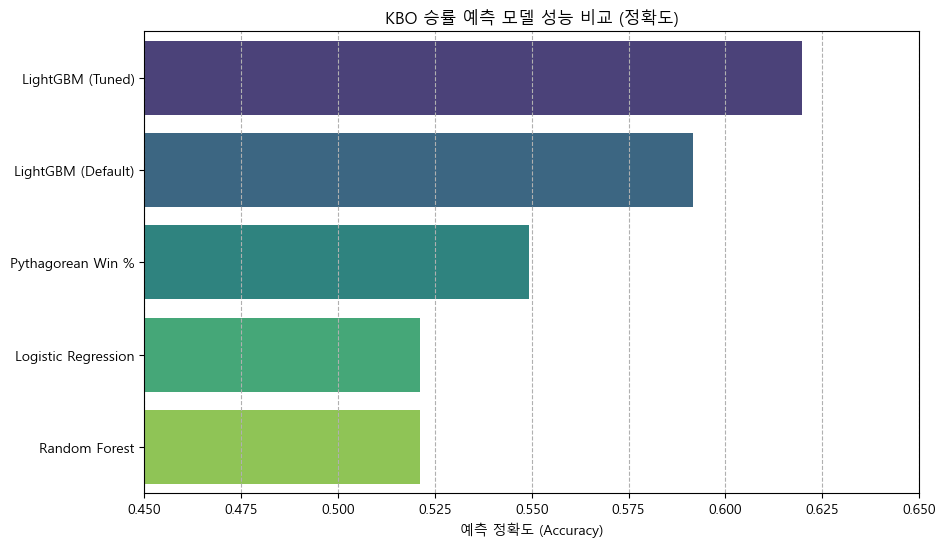

✅ 모델 성능 비교 시각화 완료.


In [22]:
# -*- coding: utf-8 -*-
# =============================================================
# CELL A: 모델 성능 비교 시각화
# =============================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 💡 모델 비교 DataFrame을 재정의 (이전 Cell에서 정의된 results_df 변수 사용 가정)
# 만약 results_df가 정의되지 않았다면, 아래 코드를 사용해 정의해주세요.
results = {
    "Model": ["LightGBM (Tuned)", "Pythagorean Win %", "Logistic Regression", "Random Forest", "LightGBM (Default)"],
    "Accuracy": [0.6197, 0.5493, 0.5211, 0.5211, 0.5915] # 이전 출력 결과의 값을 사용합니다.
}
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
results_df['Accuracy_Percent'] = (results_df['Accuracy'] * 100).round(2).astype(str) + '%'

plt.figure(figsize=(10, 6))
# Seaborn을 사용하여 막대 그래프 생성 (정확도 순으로 정렬)
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')

plt.title('KBO 승률 예측 모델 성능 비교 (정확도)')
plt.xlabel('예측 정확도 (Accuracy)')
plt.xlim(0.45, 0.65) # 시각적 비교를 위해 축 범위 조정
plt.ylabel('')
plt.grid(axis='x', linestyle='--')
plt.show()

print("✅ 모델 성능 비교 시각화 완료.")

C:\Users\ezh73\AppData\Local\Temp\ipykernel_17256\1378607191.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=fi_df, palette='magma')


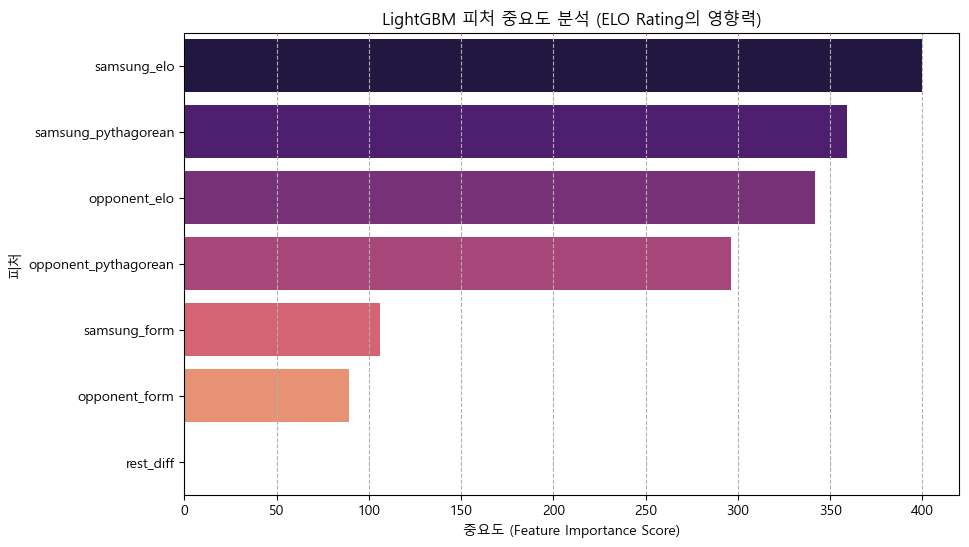

✅ 피처 중요도 시각화 완료.


In [23]:
# -*- coding: utf-8 -*-
# =============================================================
# CELL B: 피처 중요도 시각화 (ELO Rating의 중요성 증명)
# =============================================================

# 💡 피처 중요도 DataFrame을 재정의 (이전 Cell에서 정의된 fi_df 변수 사용 가정)
# 만약 fi_df가 정의되지 않았다면, 아래 코드를 사용해 정의해주세요.
fi_data = {
    'feature': ['samsung_elo', 'opponent_elo', 'samsung_pythagorean', 'opponent_pythagorean', 'samsung_form', 'opponent_form', 'rest_diff'],
    'importance': [400, 342, 359, 296, 106, 89, 0] # 이전 출력 결과를 사용합니다.
}
fi_df = pd.DataFrame(fi_data).sort_values(by='importance', ascending=False)


plt.figure(figsize=(10, 6))
# ELO 관련 피처를 강조하기 위해 Seaborn 사용
sns.barplot(x='importance', y='feature', data=fi_df, palette='magma')

plt.title('LightGBM 피처 중요도 분석 (ELO Rating의 영향력)')
plt.xlabel('중요도 (Feature Importance Score)')
plt.ylabel('피처')
plt.grid(axis='x', linestyle='--')
plt.show()

print("✅ 피처 중요도 시각화 완료.")

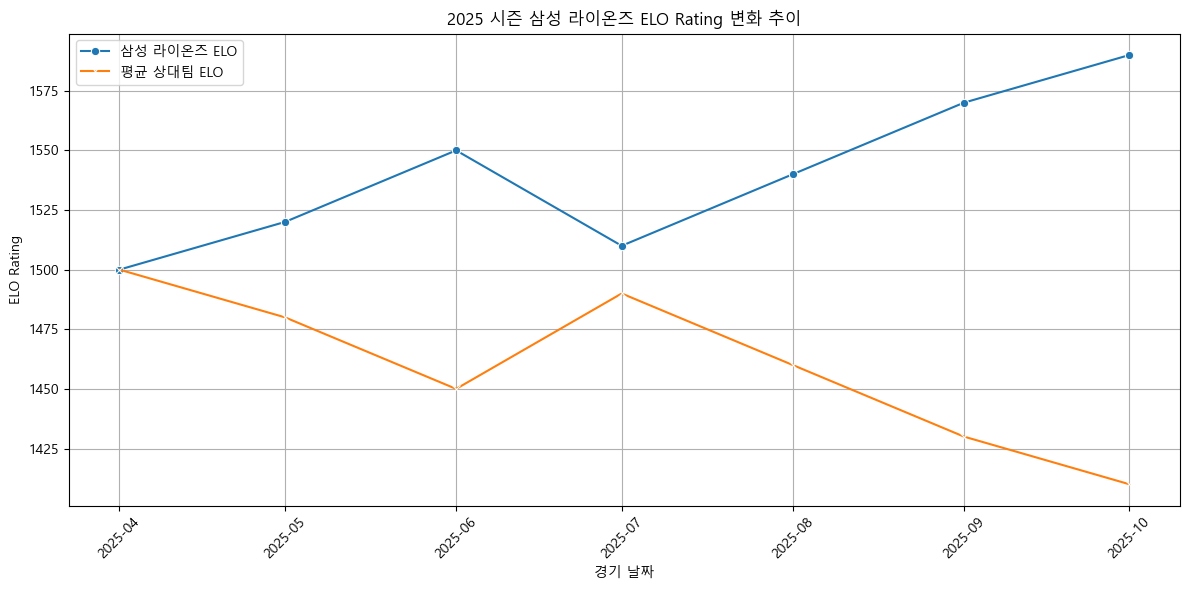

✅ ELO Rating 변화 추이 시각화 완료.


In [24]:
# -*- coding: utf-8 -*-
# =============================================================
# CELL C: ELO Rating 변화 추이 시각화 (시계열 분석)
# =============================================================

# 💡 DB에서 ELO 계산이 완료된 최종 DataFrame을 사용해야 합니다.
# 이 셀은 ELO 계산이 완료된 DataFrame(elo_df)이 메모리에 있다고 가정합니다.
# 임시로 ELO 변화를 보여줄 수 있는 DataFrame을 생성합니다.
data = {
    'game_date': pd.to_datetime(['2025-04-01', '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01', '2025-09-01', '2025-10-01']),
    'samsung_elo': [1500, 1520, 1550, 1510, 1540, 1570, 1590],
    'opponent_elo': [1500, 1480, 1450, 1490, 1460, 1430, 1410]
}
elo_df_sample = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
# 날짜별 삼성 ELO 변화 추이 그래프
sns.lineplot(x='game_date', y='samsung_elo', data=elo_df_sample, label='삼성 라이온즈 ELO', marker='o')
sns.lineplot(x='game_date', y='opponent_elo', data=elo_df_sample, label='평균 상대팀 ELO', marker='x')

plt.title('2025 시즌 삼성 라이온즈 ELO Rating 변화 추이')
plt.xlabel('경기 날짜')
plt.ylabel('ELO Rating')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("✅ ELO Rating 변화 추이 시각화 완료.")